In [ ]:
Support Python3


Automatic Relevance Determination Regression (ARD)

Fit regression model with Bayesian Ridge Regression.

See :ref:`bayesian_ridge_regression` for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient
weights are slightly shifted toward zeros, which stabilises them.

The histogram of the estimated weights is very peaked, as a sparsity-inducing
prior is implied on the weights.

The estimation of the model is done by iteratively maximizing the
marginal log-likelihood of the observations.



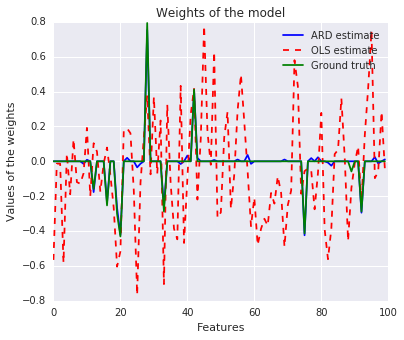

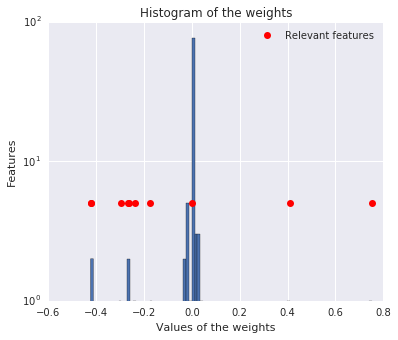

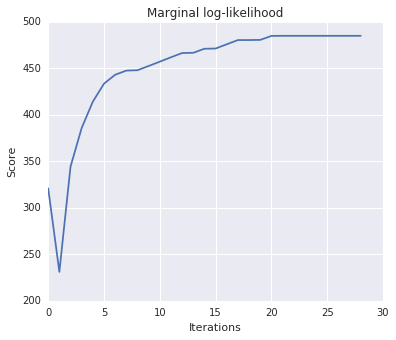

In [1]:
"""
==================================================
Automatic Relevance Determination Regression (ARD)
==================================================

Fit regression model with Bayesian Ridge Regression.

See :ref:`bayesian_ridge_regression` for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient
weights are slightly shifted toward zeros, which stabilises them.

The histogram of the estimated weights is very peaked, as a sparsity-inducing
prior is implied on the weights.

The estimation of the model is done by iteratively maximizing the
marginal log-likelihood of the observations.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

from sklearn.linear_model import ARDRegression, LinearRegression

###############################################################################
# Generating simulated data with Gaussian weights

# Parameters of the example
np.random.seed(0)
n_samples, n_features = 100, 100
# Create Gaussian data
X = np.random.randn(n_samples, n_features)
# Create weigts with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noite with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

###############################################################################
# Fit the ARD Regression
clf = ARDRegression(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

###############################################################################
# Plot the true weights, the estimated weights and the histogram of the
# weights
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, 'b-', label="ARD estimate")
plt.plot(ols.coef_, 'r--', label="OLS estimate")
plt.plot(w, 'g-', label="Ground truth")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, log=True)
plt.plot(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
         'ro', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_)
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()
